In [1]:
import pandas as pd
import numpy as np
from rdkit.Chem import PandasTools
from rdkit import Chem
import molvs as mv

In [2]:
df_train = PandasTools.LoadSDF('/ihome/gidakwo/ml_files/SMILES/Tox21/tox21_10k_data_all.sdf')
df_leaderbd = PandasTools.LoadSDF('/ihome/gidakwo/ml_files/SMILES/Tox21/tox21_10k_challenge_test.sdf')

tox21_df = pd.concat([df_train, df_leaderbd])
tox21_df.shape

(12052, 19)

In [3]:
tox21_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12052 entries, 0 to 295
Data columns (total 19 columns):
Compound Batch ID    295 non-null object
Compound ID          295 non-null object
DSSTox_CID           11757 non-null object
FW                   11757 non-null object
Formula              11757 non-null object
ID                   12052 non-null object
NR-AR                9647 non-null object
NR-AR-LBD            8846 non-null object
NR-AhR               8435 non-null object
NR-Aromatase         7435 non-null object
NR-ER                7957 non-null object
NR-ER-LBD            9033 non-null object
NR-PPAR-gamma        8445 non-null object
ROMol                12052 non-null object
SR-ARE               7397 non-null object
SR-ATAD5             9357 non-null object
SR-HSE               8412 non-null object
SR-MMP               7553 non-null object
SR-p53               8897 non-null object
dtypes: object(19)
memory usage: 1.8+ MB


In [4]:
keep_cols = ['NR-AR', 'NR-AR-LBD', 'NR-AhR', 'NR-Aromatase', 'NR-ER', 'NR-ER-LBD', 'NR-PPAR-gamma',
            'SR-ARE', 'SR-ATAD5', 'SR-HSE', 'SR-MMP', 'SR-p53', 'ROMol']
tox21_df = tox21_df[keep_cols]

,NR-AR,NR-AR-LBD,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53,ROMol
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,
4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

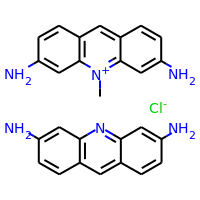
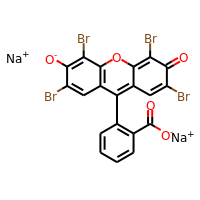
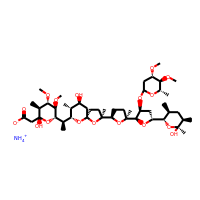
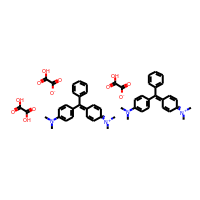
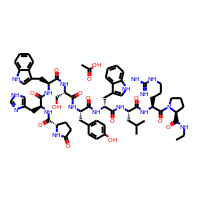

In [5]:
tox21_df.head()

In [6]:
tox21_df['smiles'] = tox21_df['ROMol'].apply(Chem.MolToSmiles)
tox21_df['Inchi'] = tox21_df['ROMol'].apply(Chem.MolToInchi)
tox21_df['InchiKey'] = tox21_df['Inchi'].apply(Chem.InchiToInchiKey)

In [ ]:
#Function to get parent of a smiles
#Source: https://www.wildcardconsulting.dk/useful-information/a-deep-tox21-neural-network-with-rdkit-and-keras/
def parent(smiles):
    st = mv.Standardizer() #MolVS standardizer
    try:
        mols = st.charge_parent(Chem.MolFromSmiles(smiles))
        return Chem.MolToSmiles(mols)
    except:
        return "NaN"

#Clean and standardize the data
def clean_data(data):
    #remove missing smiles
    data = data[~(data['smiles'].isnull())]
    
    #Standardize and get parent with molvs
    data["smiles_parent"] = data.smiles.apply(parent)
    data = data[~(data['smiles_parent'] == "NaN")]
    
    #Filter small fragents away.................................???
    def NumAtoms(smile):
        return Chem.MolFromSmiles(smile).GetNumAtoms()
    
    data["NumAtoms"] = data["smiles_parent"].apply(NumAtoms)
    data = data[data["NumAtoms"] > 3]
    return data

In [ ]:
tox21_df = clean_data(tox21_df)

In [ ]:
#Toxcast Data set is available at: https://www.epa.gov/chemical-research/toxicity-forecaster-toxcasttm-data
#  Download ToxCast Summary Information -> INVITRODB_V2_SUMMARY.zip -> oldstyle_ac50_Matrix_151020.csv